## 計算報酬率範例:

計算方式：進出場皆以符合策略當日**收盤價**計算，

請計算手續費0.1425%（買賣）及稅0.3%（賣出），
* 買入成交價(股價) =  **收盤價** 乘上 1.001425
* 賣出成交價(股價) =  **收盤價** 乘上 0.995575  

初始本金為 **50萬元**

報酬率計算方式為
((最後收入 - 初始金額) / 初始金額) * 100%

## 策略:5日線突破10日線買入，10日線突破5日線賣出

支出： 500000 元
收入： 777758 元
淨收益： 277758 元
投資報酬率： 55.55 %


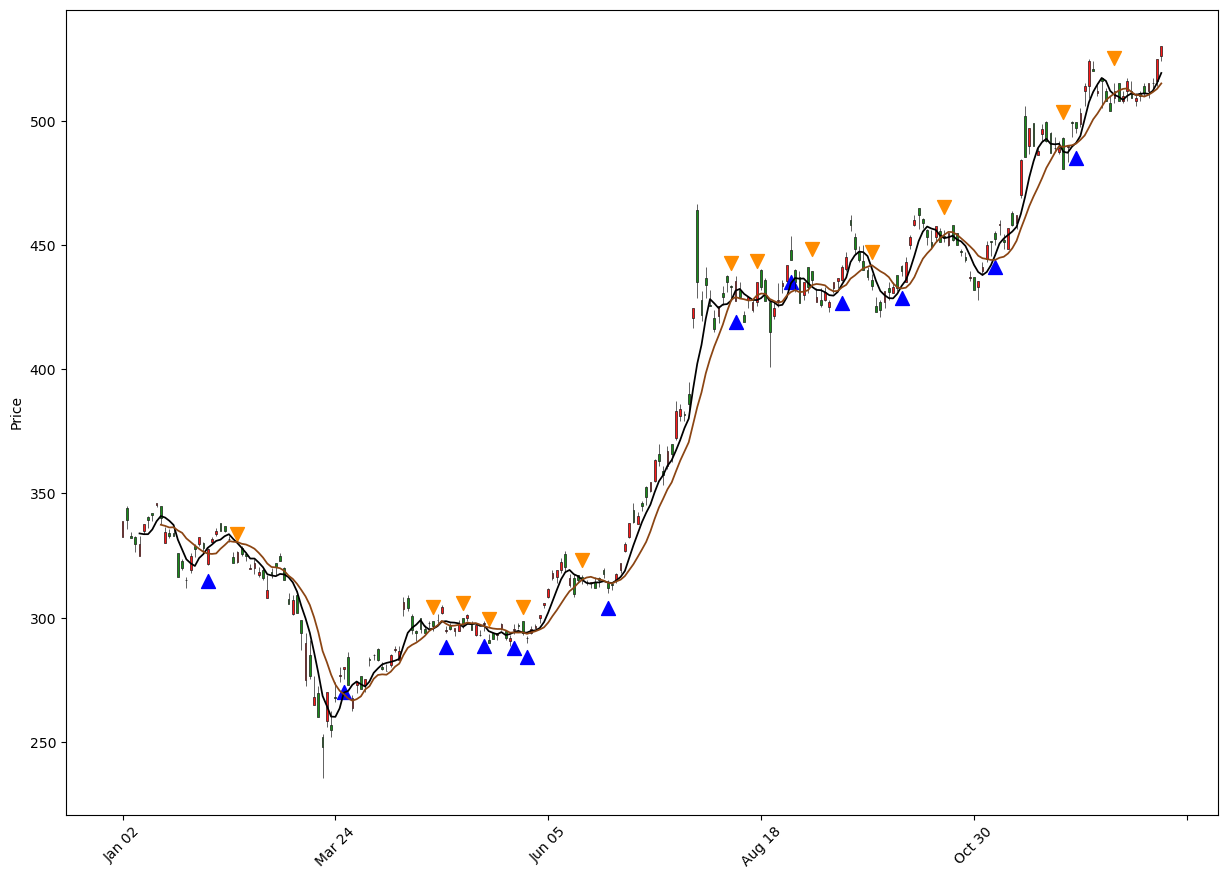

初始金額: 500000 元


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,2020/2/10,+1524,327.5,328.0,-499872,-499872,128
2,2/19,-1524,326.5,325,+495384,-4488,495512
3,2020/3/26,+1767,280.0,280.4,-495467,-499955,45
4,4/28,-1767,296.5,295,+521597,21642,521642
5,2020/5/4,+1765,295.0,295.4,-521381,-499739,261
6,5/8,-1765,297.5,296,+522764,23025,523025
7,2020/5/15,+1752,298.0,298.4,-522797,-499772,228
8,5/18,-1752,290.0,289,+505832,6060,506060
9,2020/5/26,+1710,295.5,295.9,-505989,-499929,71


In [11]:
#畫點 & 計算！
import numpy as np
import pandas as pd
import mplfinance as mpf
from datetime import datetime
import math
stocks = pd.read_csv('2330_2020.csv')
stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
#stocks = stocks[50:150]
stocks = stocks.loc['2020-01-01':'2020-12-31',:]
colorSet = mpf.make_marketcolors(up = 'r', down = 'g')
styleSet = mpf.make_mpf_style(marketcolors = colorSet)
kwargs = dict(type = 'candle', figscale = 2, style = styleSet)
stocks_close = [float(line) for line in stocks['Close']]
stocks_high = [float(line) for line in stocks['High']]
stocks_low = [float(line) for line in stocks['Low']]
def making_averages(days):
    days_mav = [np.nan] * (days - 1)
    for i in range((days - 1), len(stocks_close)):
        days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
    return days_mav

################################################################################################################################
#策略實現
FiveMav = making_averages(5)    #宣告串列 -> 5日線
TenMav = making_averages(10)    #宣告串列 -> 10日線

#繪製點所使用的串列 (初始化)
points_buy = [np.nan] * len(stocks)    #買入點
points_sell = [np.nan] * len(stocks)   #賣出點

#初始金額
initial = 500000
money = initial

#持有股票數量(股)
stock = 0

#每次購入張數
unit = 1

#目前獲利
gain = 0

#紀錄交易資訊
detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額']]

#暫時交易資訊
temp_detail = []

for i in range(11, len(stocks)):
    if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
        price = round(stocks_close[i] * 1.001425, 1)                                   #計算含稅的股價
        num = math.floor(money/price)                                                  #計算能購買的股數(含稅),無條件捨去小數點
        buy = round(num*price)                                                         #計算實際花費
        money = money-buy                                                              # 更新 money
        #淨收益計算(含稅)
        gain -= buy
        #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
        points_buy[i] = stocks_low[i] * 0.98
        
        #交易資訊(日期)
        temp_detail.append(str(datetime.date(stocks['Date'][i]).year) + '/' +str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('+' + str(num))                                             #買賣 num股
        stock += num                                                                   #更新持有股數 +num股
        temp_detail.append(stocks_close[i])                                            #購買日買入價格: "收盤價"
        temp_detail.append(price)                                                      #抽稅之後的價格(含稅)
        temp_detail.append('-' + str(buy))                                             #實際花費 buy元
        temp_detail.append(gain)                                                       #目前獲利
        temp_detail.append(money)                                                      #剩餘金額
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊   
        
    if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i] and stock > 0):
        #出現賣點則全數賣出
        sell = round(stocks_close[i] * 0.995575 * stock)                               #計算實際收入
        money = money + sell                                                           # 更新 money
        
        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += sell
        
        #交易資訊(日期)
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('-' + str(stock))                                           #股票全部賣出
        temp_detail.append(stocks_close[i])                                            #賣出日賣出價格: "收盤價"
        temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格(含稅)
        temp_detail.append('+' + str(sell))                                            #實際收入 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        temp_detail.append(money)                                                      #剩餘金額
        stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊            


#將持有的股數全數出清
if(stock!=0):
    sell = round(stocks_close[i] * 0.995575 * stock)                               #計算實際收入
    money = money + sell                                                           # 更新 money

    #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
    points_sell[i] = stocks_high[i] * 1.02
    #淨收益計算
    gain += sell

    #交易資訊(日期)
    temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
    temp_detail.append('-' + str(stock))                                           #股票全部賣出
    temp_detail.append(stocks_close[i])                                            #賣出日賣出價格: "收盤價"
    temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格(含稅)
    temp_detail.append('+' + str(sell))                                            #實際收入 (四捨五入到個位數)
    temp_detail.append(gain)                                                       #目前獲利
    temp_detail.append(money)                                                      #剩餘金額
    stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
    detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
    temp_detail = []                                                               #清除暫存交易資訊            
#支出、收入、淨收益、投資報酬率
cost = initial
income = money     
print("支出：", cost, "元")
print("收入：", income, "元")
print("淨收益：", income - cost, "元")
print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")        
#點狀圖 type = 'scatter'，markersize可以更改 marker大小
addplots = [
            mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
            mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
            mpf.make_addplot(FiveMav, color = 'black'),
            mpf.make_addplot(TenMav, color = 'saddlebrown')
           ]
mpf.plot(stocks, **kwargs, addplot = addplots)
print("初始金額:", initial, '元')
detail = pd.DataFrame(detail)
detail

In [2]:
import os
path = os.getcwd() # 取得此檔案當前的工作路徑
print(path)
list_csv = os.listdir(path) # 取得此路徑中的所有檔案
print(list_csv)
lists = [file for file in list_csv if '.csv' in file] # 過濾出股價檔(.csv)
print(lists)

C:\Users\Landis\Documents\GitHub\stock_project\Week17_final_report
['.ipynb_checkpoints', '0050_2018.csv', '1304_2011.csv', '1762_2010.csv', '2065_2017.csv', '2236_2015.csv', '2330_2020.csv', '2603_2020.csv', '2748_2016.csv', '2886_2019.csv', '2926_2013.csv', 'data_10.zip', 'final_report.ipynb', 'need.txt']
['0050_2018.csv', '1304_2011.csv', '1762_2010.csv', '2065_2017.csv', '2236_2015.csv', '2330_2020.csv', '2603_2020.csv', '2748_2016.csv', '2886_2019.csv', '2926_2013.csv']


In [5]:
# 裡用for迴圈 執行不同的股價檔計算報酬率
#畫點 & 計算！
import numpy as np

import pandas as pd
import mplfinance as mpf
from datetime import datetime
import math

for file in lists:
    print(file)
    stocks = pd.read_csv(file)
    stocks.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
    stocks = stocks.set_index(pd.DatetimeIndex(stocks["Date"]))
    stocks.iloc[:, 0] = pd.to_datetime(stocks.iloc[:, 0], format = "%Y/%m/%d")
    #stocks = stocks[50:150]
    #stocks = stocks.loc['2020-01-01':'2020-12-31',:]
    colorSet = mpf.make_marketcolors(up = 'r', down = 'g')
    styleSet = mpf.make_mpf_style(marketcolors = colorSet)
    kwargs = dict(type = 'candle', figscale = 2, style = styleSet)
    stocks_close = [float(line) for line in stocks['Close']]
    stocks_high = [float(line) for line in stocks['High']]
    stocks_low = [float(line) for line in stocks['Low']]
    def making_averages(days):
        days_mav = [np.nan] * (days - 1)
        for i in range((days - 1), len(stocks_close)):
            days_mav.append( sum( stocks_close[i-(days - 1) : i+1]) / (days) )
        return days_mav

    ################################################################################################################################
    #策略實現
    FiveMav = making_averages(5)    #宣告串列 -> 5日線
    TenMav = making_averages(10)    #宣告串列 -> 10日線

    #繪製點所使用的串列 (初始化)
    points_buy = [np.nan] * len(stocks)    #買入點
    points_sell = [np.nan] * len(stocks)   #賣出點

    #初始金額
    initial = 500000
    money = initial

    #持有股票數量(股)
    stock = 0

    #每次購入張數
    unit = 1

    #目前獲利
    gain = 0

    #紀錄交易資訊
    detail = [['日期', '買/賣(+/-)', '價格', '價格(稅)', '實際花費', '目前獲利', '剩餘金額']]

    #暫時交易資訊
    temp_detail = []

    for i in range(11, len(stocks)):
        if(FiveMav[i - 1] < TenMav[i - 1] and FiveMav[i] > TenMav[i]):
            price = round(stocks_close[i] * 1.001425, 1)                                   #計算含稅的股價
            num = math.floor(money/price)                                                  #計算能購買的股數(含稅),無條件捨去小數點
            buy = round(num*price)                                                         #計算實際花費
            money = money-buy                                                              # 更新 money
            #淨收益計算(含稅)
            gain -= buy
            #繪製點所使用的陣列， 購買日最低價 * 0.98方便觀看
            points_buy[i] = stocks_low[i] * 0.98

            #交易資訊(日期)
            temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
            temp_detail.append('+' + str(num))                                             #買賣 num股
            stock += num                                                                   #更新持有股數 +num股
            temp_detail.append(stocks_close[i])                                            #購買日買入價格: "收盤價"
            temp_detail.append(price)                                                      #抽稅之後的價格(含稅)
            temp_detail.append('-' + str(buy))                                             #實際花費 buy元
            temp_detail.append(gain)                                                       #目前獲利
            temp_detail.append(money)                                                      #剩餘金額
            detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
            temp_detail = []                                                               #清除暫存交易資訊   

        if(FiveMav[i - 1] > TenMav[i - 1] and FiveMav[i] < TenMav[i] and stock > 0):
            #出現賣點則全數賣出
            sell = round(stocks_close[i] * 0.995575 * stock)                               #計算實際收入
            money = money + sell                                                           # 更新 money

            #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
            points_sell[i] = stocks_high[i] * 1.02
            #淨收益計算
            gain += sell

            #交易資訊(日期)
            temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
            temp_detail.append('-' + str(stock))                                           #股票全部賣出
            temp_detail.append(stocks_close[i])                                            #賣出日賣出價格: "收盤價"
            temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格(含稅)
            temp_detail.append('+' + str(sell))                                            #實際收入 (四捨五入到個位數)
            temp_detail.append(gain)                                                       #目前獲利
            temp_detail.append(money)                                                      #剩餘金額
            stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
            detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
            temp_detail = []                                                               #清除暫存交易資訊            


    #將持有的股數全數出清
    if(stock!=0):
        sell = round(stocks_close[i] * 0.995575 * stock)                               #計算實際收入
        money = money + sell                                                           # 更新 money

        #繪製點所使用的陣列， 賣出日最高價 * 1.02方便觀看
        points_sell[i] = stocks_high[i] * 1.02
        #淨收益計算
        gain += sell

        #交易資訊(日期)
        temp_detail.append(str(datetime.date(stocks['Date'][i]).month) + '/' + str(datetime.date(stocks['Date'][i]).day))
        temp_detail.append('-' + str(stock))                                           #股票全部賣出
        temp_detail.append(stocks_close[i])                                            #賣出日賣出價格: "收盤價"
        temp_detail.append(round(stocks_close[i] * 0.995575))                          #抽稅之後的價格(含稅)
        temp_detail.append('+' + str(sell))                                            #實際收入 (四捨五入到個位數)
        temp_detail.append(gain)                                                       #目前獲利
        temp_detail.append(money)                                                      #剩餘金額
        stock = 0                                                                      #因為全部股票賣出，所以當前股票張數歸零
        detail.append(temp_detail)                                                     #紀錄交易資訊至正是表格中
        temp_detail = []                                                               #清除暫存交易資訊            
    
    #支出、收入、淨收益、投資報酬率
    cost = initial
    income = money     
    print("支出：", cost, "元")
    print("收入：", income, "元")
    print("淨收益：", income - cost, "元")
    print("投資報酬率：", round(100 * (income - cost) / cost, 2), "%")        
    
    #繪製點狀圖 type = 'scatter'，markersize可以更改 marker大小
    """
    addplots = [
                mpf.make_addplot(points_buy, type = 'scatter', color = 'blue', marker = '^', markersize = 100),
                mpf.make_addplot(points_sell, type = 'scatter', color = 'darkorange', marker = 'v', markersize = 100),
                mpf.make_addplot(FiveMav, color = 'black'),
                mpf.make_addplot(TenMav, color = 'saddlebrown')
               ]
    mpf.plot(stocks, **kwargs, addplot = addplots)                                      #繪製交易買賣點
    """
    #print("初始金額:", initial, '元')
    detail = pd.DataFrame(detail)                                                       #製作交易資訊表格
    display(detail)                                                                     #顯示交易資訊表格，pandas
    print()

0050_2018.csv
支出： 500000 元
收入： 637538 元
淨收益： 137538 元
投資報酬率： 27.51 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,2/26,+6060,82.4,82.5,-499950,-499950,50
2,3/7,-6060,81.8,81,+493514,-6436,493564
3,3/9,+5946,82.85,83.0,-493518,-499954,46
4,3/22,-5946,83.55,83,+494590,-5364,494636
...,...,...,...,...,...,...,...
74,1/28,-5072,130.35,130,+658210,158239,658239
75,2/5,+4875,134.8,135.0,-658125,-499886,114
76,2/26,-4875,133.4,133,+647447,147561,647561
77,3/15,+4793,134.9,135.1,-647534,-499973,27



1304_2011.csv
支出： 500000 元
收入： 406139 元
淨收益： -93861 元
投資報酬率： -18.77 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,3/15,+13477,37.0,37.1,-499997,-499997,3
2,3/29,-13477,39.6,39,+531328,31331,531331
3,4/7,+13022,40.7,40.8,-531298,-499967,33
4,4/14,-13022,39.5,39,+512093,12126,512126
...,...,...,...,...,...,...,...
244,1/12,-17618,21.5,21,+377111,-122882,377118
245,1/28,+18218,20.65,20.7,-377113,-499995,5
246,3/5,-18218,21.7,22,+393581,-106414,393586
247,3/8,+16892,23.25,23.3,-393584,-499998,2



1762_2010.csv
支出： 500000 元
收入： 299168 元
淨收益： -200832 元
投資報酬率： -40.17 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,1/5,+7886,63.3,63.4,-499972,-499972,28
2,1/17,-7886,63.7,63,+500115,143,500143
3,1/24,+7453,67.0,67.1,-500096,-499953,47
4,2/14,-7453,67.4,67,+500109,156,500156
...,...,...,...,...,...,...,...
285,12/30,-4503,61.5,61,+275709,-224282,275718
286,2/17,+5115,53.8,53.9,-275698,-499980,20
287,3/8,-5115,58.2,58,+296376,-203604,296396
288,3/22,+5127,57.7,57.8,-296341,-499945,55



2065_2017.csv
支出： 500000 元
收入： 419797 元
淨收益： -80203 元
投資報酬率： -16.04 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,5/22,+13157,37.9,38.0,-499966,-499966,34
2,5/23,-13157,37.3,37,+488585,-11381,488619
3,6/6,+13029,37.4,37.5,-488588,-499969,31
4,6/9,-13029,37.1,37,+481237,-18732,481268
...,...,...,...,...,...,...,...
102,12/23,-9011,45.7,45,+409980,-90003,409997
103,1/13,+9070,45.15,45.2,-409964,-499967,33
104,1/18,-9070,44.55,44,+402280,-97687,402313
105,2/19,+9000,44.65,44.7,-402300,-499987,13



2236_2015.csv
支出： 500000 元
收入： 191355 元
淨收益： -308645 元
投資報酬率： -61.73 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,6/25,+10706,46.65,46.7,-499970,-499970,30
2,7/3,-10706,41.55,41,+442866,-57104,442896
3,9/2,+17233,25.7,25.7,-442888,-499992,8
4,9/10,-17233,24.7,25,+423772,-76220,423780
...,...,...,...,...,...,...,...
148,1/11,-10291,19.45,19,+199274,-300722,199278
149,1/28,+10543,18.85,18.9,-199263,-499985,15
150,3/9,-10543,18.45,18,+193658,-306327,193673
151,3/17,+9781,19.8,19.8,-193664,-499991,9



2330_2020.csv
支出： 500000 元
收入： 667222 元
淨收益： 167222 元
投資報酬率： 33.44 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,2/10,+1524,327.5,328.0,-499872,-499872,128
2,2/19,-1524,326.5,325,+495384,-4488,495512
3,3/26,+1767,280.0,280.4,-495467,-499955,45
4,4/28,-1767,296.5,295,+521597,21642,521642
5,5/4,+1765,295.0,295.4,-521381,-499739,261
6,5/8,-1765,297.5,296,+522764,23025,523025
7,5/15,+1752,298.0,298.4,-522797,-499772,228
8,5/18,-1752,290.0,289,+505832,6060,506060
9,5/26,+1710,295.5,295.9,-505989,-499929,71



2603_2020.csv
支出： 500000 元
收入： 4863682 元
淨收益： 4363682 元
投資報酬率： 872.74 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,2/12,+42372,11.8,11.8,-499990,-499990,10
2,3/9,+0,11.4,11.4,-0,-499990,10
3,3/12,-42372,11.1,11,+468248,-31742,468258
4,3/30,+50897,9.23,9.2,-468252,-499994,6
5,4/1,-50897,9.1,9,+461113,-38881,461119
6,4/9,+44768,10.25,10.3,-461110,-499991,9
7,4/22,-44768,9.88,10,+440351,-59640,440360
8,4/29,+41155,10.7,10.7,-440358,-499998,2
9,5/11,-41155,10.75,11,+440459,-59539,440461



2748_2016.csv
支出： 500000 元
收入： 483281 元
淨收益： -16719 元
投資報酬率： -3.34 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,12/14,+10204,48.95,49.0,-499996,-499996,4
2,12/19,-10204,48.2,48,+489656,-10340,489660
3,12/28,+10137,48.2,48.3,-489617,-499957,43
4,2/2,-10137,53.3,53,+537911,37954,537954
...,...,...,...,...,...,...,...
94,12/3,-10885,41.95,42,+454605,-45392,454608
95,12/30,+10849,41.8,41.9,-454573,-499965,35
96,1/7,-10849,40.65,40,+439060,-60905,439095
97,2/5,+11032,39.75,39.8,-439074,-499979,21



2886_2019.csv
支出： 500000 元
收入： 554750 元
淨收益： 54750 元
投資報酬率： 10.95 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,2/19,+18656,26.8,26.8,-499981,-499981,19
2,3/8,-18656,27.0,27,+501483,1502,501502
3,3/11,+18370,27.25,27.3,-501501,-499999,1
4,3/29,-18370,28.05,28,+512998,12999,512999
5,4/8,+18256,28.05,28.1,-512994,-499995,5
6,4/19,-18256,28.15,28,+511632,11637,511637
7,4/24,+17827,28.65,28.7,-511635,-499998,2
8,5/14,-17827,29.5,29,+523569,23571,523571
9,5/21,+17054,30.65,30.7,-523558,-499987,13



2926_2013.csv
支出： 500000 元
收入： 248408 元
淨收益： -251592 元
投資報酬率： -50.32 %


,0,1,2,3,4,5,6
0,日期,買/賣(+/-),價格,價格(稅),實際花費,目前獲利,剩餘金額
1,3/27,+2234,223.5,223.8,-499969,-499969,31
2,3/28,-2234,222.0,221,+493753,-6216,493784
3,7/8,+2909,169.5,169.7,-493657,-499873,127
4,7/29,-2909,182.0,181,+527095,27222,527222
...,...,...,...,...,...,...,...
162,12/31,-3199,79.4,79,+252877,-247052,252948
163,2/1,+3399,74.3,74.4,-252886,-499938,62
164,3/5,-3399,74.6,74,+252443,-247495,252505
165,3/17,+3326,75.8,75.9,-252443,-499938,62
